In [23]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns#Understanding my variables 

%matplotlib inline

df = pd.read_csv('filing_counts.csv')

#Remove columns that I dont need
DeleteList=['for_total', 'case_action', 'year']
df=df.drop(DeleteList, axis=1)

# set identifier "case_type" as string
df["case_type"] = df["case_type"].astype("str")


# set categorial data
df["case_type"] = df ["case_type"].astype("category")
df["age_group"] = df ["age_group"].astype("category")
df["state"] = df ["state"].astype("category")


In [34]:
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()

To check: Unique count of non-numeric data
state        37
case_type     4
age_group     4
dtype: int64
Top 5 unique values of state
            state  Count
0      New Mexico     36
1  North Carolina     30
2        Colorado     30
3        Michigan     24
4           Idaho     18
 
Top 5 unique values of case_type
              case_type  Count
0             G+C+Joint    132
1     Guardianship ONLY    106
2  Conservatorship ONLY     86
3        Joint G/C ONLY     56
 
Top 5 unique values of age_group
       age_group  Count
0    Adults ONLY    149
1    Minors ONLY    118
2  Adults+Minors    100
3      Ambiguous     13
 


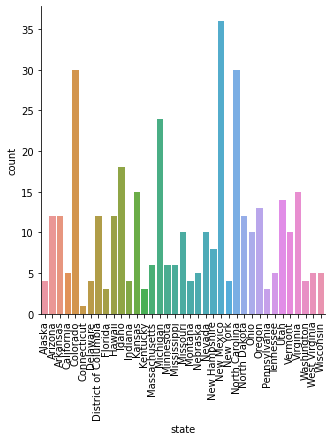

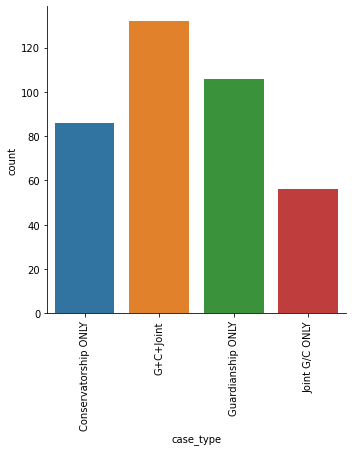

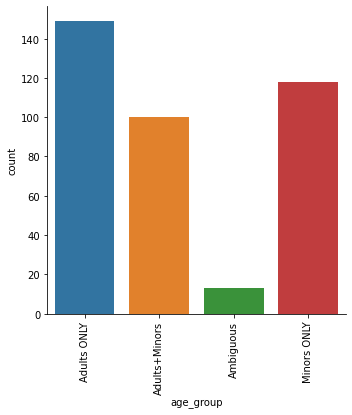

In [35]:
categorical_eda(df)

In [46]:


                    

    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")
    
    # add graphs
    
    sns.catplot(x="count", y="state", hue="age_group", kind="point", data=df, height=10, aspect=3, rotate=60, ha="right")
    df.plot(kind="scatter", x="age_group", y="state", figsize=(8,8)
    

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

SyntaxError: invalid syntax (Temp/ipykernel_11868/2737743954.py, line 49)

Preview of data:


,state,case_type,age_group,count
0,Alaska,G+C+Joint,Adults+Minors,1171
1,Alaska,G+C+Joint,Adults+Minors,1084
2,Alaska,G+C+Joint,Adults+Minors,1227



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   state      380 non-null    category
 1   case_type  380 non-null    category
 2   age_group  380 non-null    category
 3   count      380 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 5.9 KB
None

***Number of duplicated entries:  16


,state,case_type,age_group,count
71,District of Columbia,Conservatorship ONLY,Minors ONLY,1
79,District of Columbia,Conservatorship ONLY,Minors ONLY,1
97,Idaho,Conservatorship ONLY,Minors ONLY,42
103,Idaho,Conservatorship ONLY,Minors ONLY,42
99,Idaho,Joint G/C ONLY,Minors ONLY,61



To check: 
Unique count of non-numeric data

state        37
case_type     4
age_group     4
dtype: int64
Top 5 unique values of state
            state  Count
0      New Mexico     36
1  North Carolina     30
2        Colorado     30
3        Michigan     24
4           Idaho     18
 
Top 5 unique values of case_type
              case_type  Count
0             G+C+Joint    132
1     Guardianship ONLY    106
2  Conservatorship ONLY     86
3        Joint G/C ONLY     56
 
Top 5 unique values of age_group
       age_group  Count
0    Adults ONLY    149
1    Minors ONLY    118
2  Adults+Minors    100
3      Ambiguous     13
 


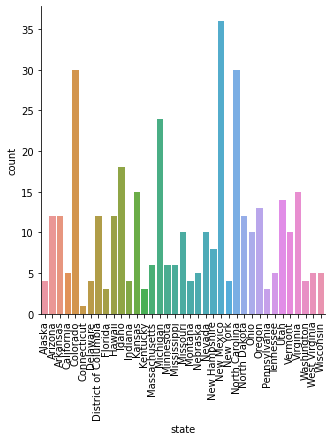

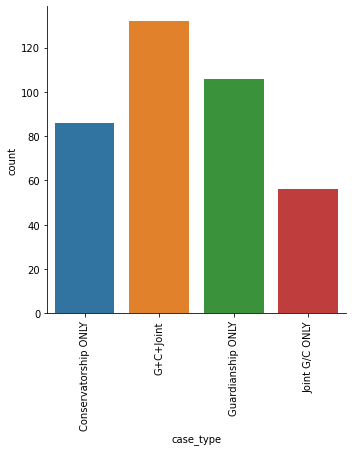

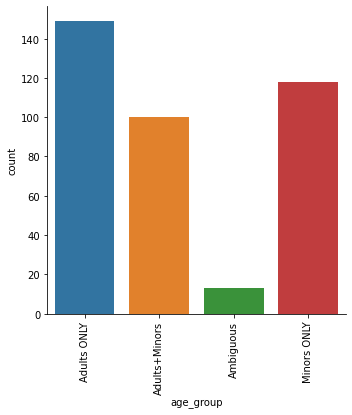


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
count,380.0,1817.15,3525.655222,0.0,144.75,592.5,2097.0,28004.0


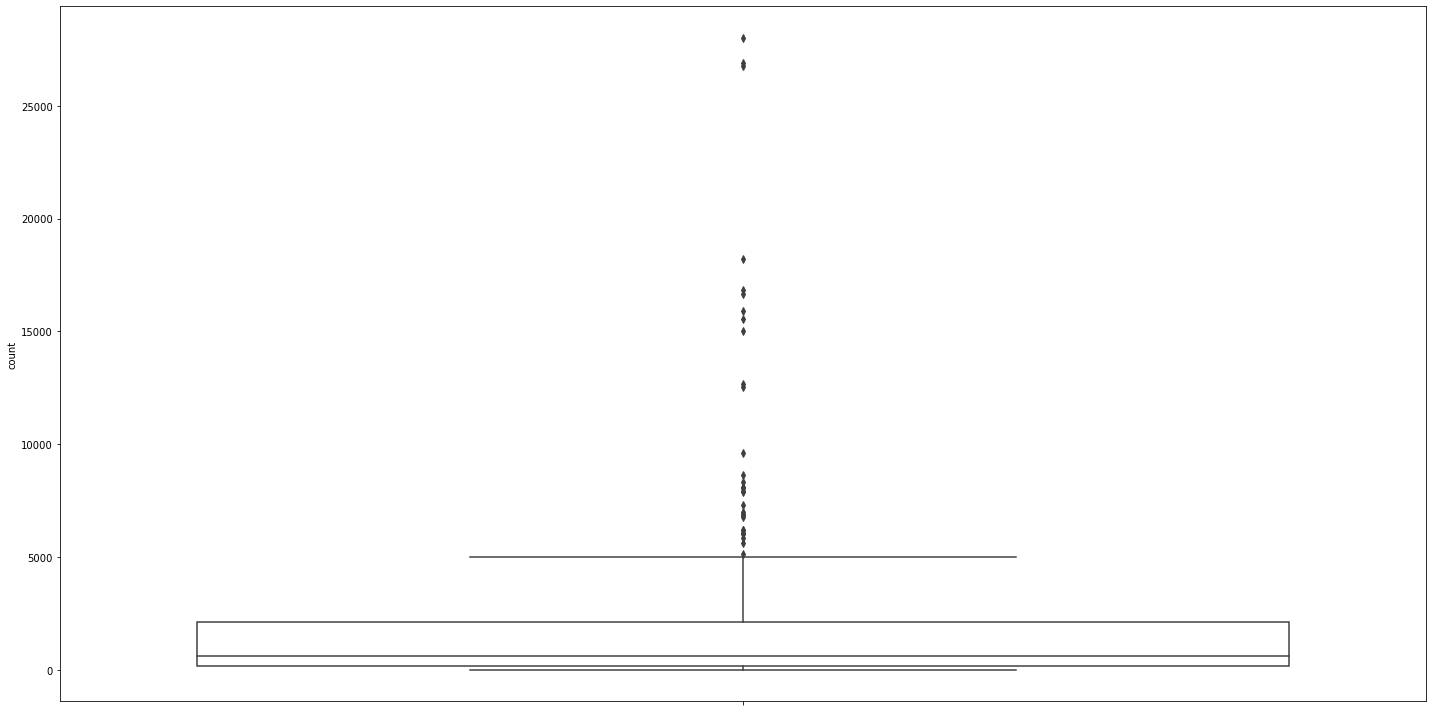

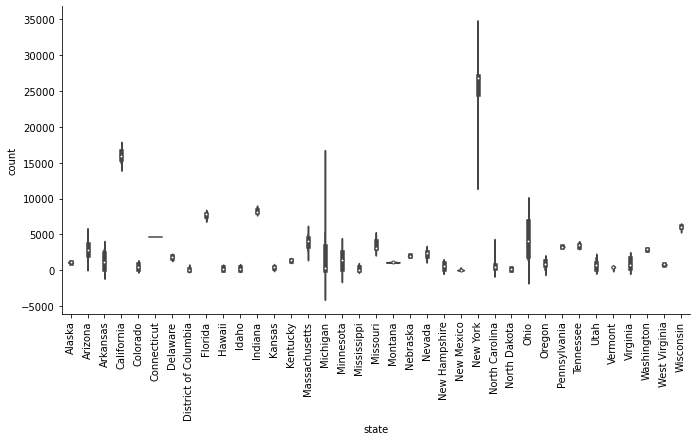

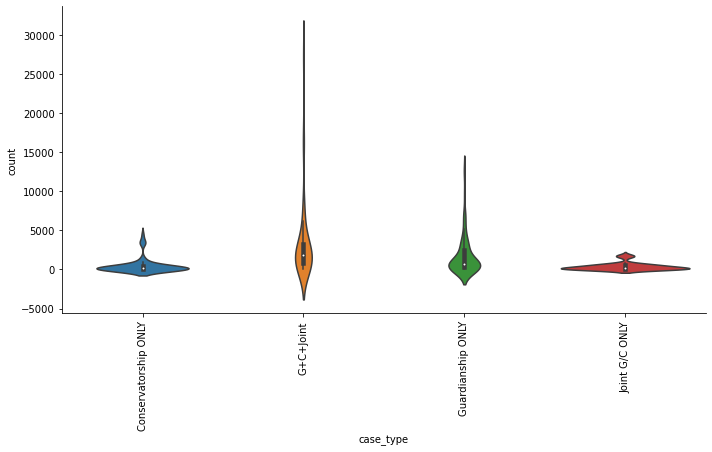

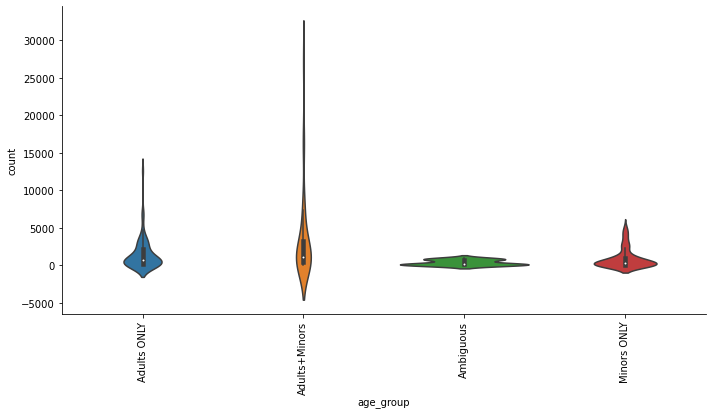


To check pairwise joint distribution of numeric data


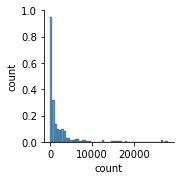


To check time series of numeric data  by daily, monthly and yearly frequency


In [37]:
eda(df)